In [45]:
import requests
import numpy as np
import time
import pandas as pd
from bs4 import BeautifulSoup as sp
from collections import Counter
import re
import seaborn as sns
import matplotlib.cm as cm

URL = 'https://www.azlyrics.com/a.html'
blank = 'https://www.azlyrics.com/'
ltrs = 'abcdefghijklmnopqrstuvwxyz'

In [25]:
df = pd.read_csv('OPM Songs.csv')
print(df)

Empty DataFrame
Columns: [Song, Artist, Album, Lyrics]
Index: []


In [69]:
for i in 'abcdefghijklmnop':
    filename = str('OPM Songs') + str(i) + str('.csv')
    edf = pd.read_csv(filename)
    edf.to_csv('OPM Songs.csv', mode='a', header=False, index=False)
df = pd.read_csv('OPM Songs.csv')
# print(df)

C:\Users\marty\AppData\Local\Temp\ipykernel_17268\3579205574.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SongCount', y='Artist', data=top_artists_df, palette='magma')


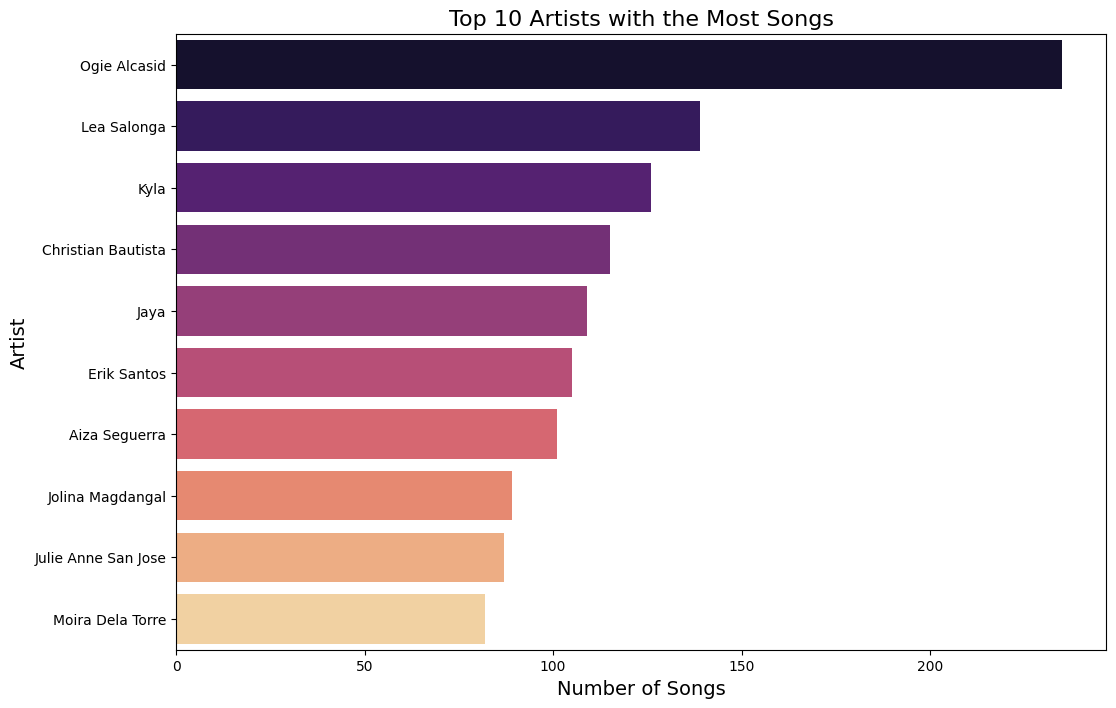

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('OPM Songs.csv')

# Group by 'Artist' and count the number of songs
artist_song_counts = df['Artist'].value_counts().head(10)

# Convert to DataFrame for easier plotting
top_artists_df = artist_song_counts.reset_index()
top_artists_df.columns = ['Artist', 'SongCount']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='SongCount', y='Artist', data=top_artists_df, palette='magma')

# Add titles and labels
plt.title('Top 10 Artists with the Most Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist', fontsize=14)

# Show the plot
plt.show()

C:\Users\marty\AppData\Local\Temp\ipykernel_17268\292239049.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_artists_df, x='Number of Songs', y='Album', palette='magma')


AttributeError: 'str' object has no attribute 'patches'

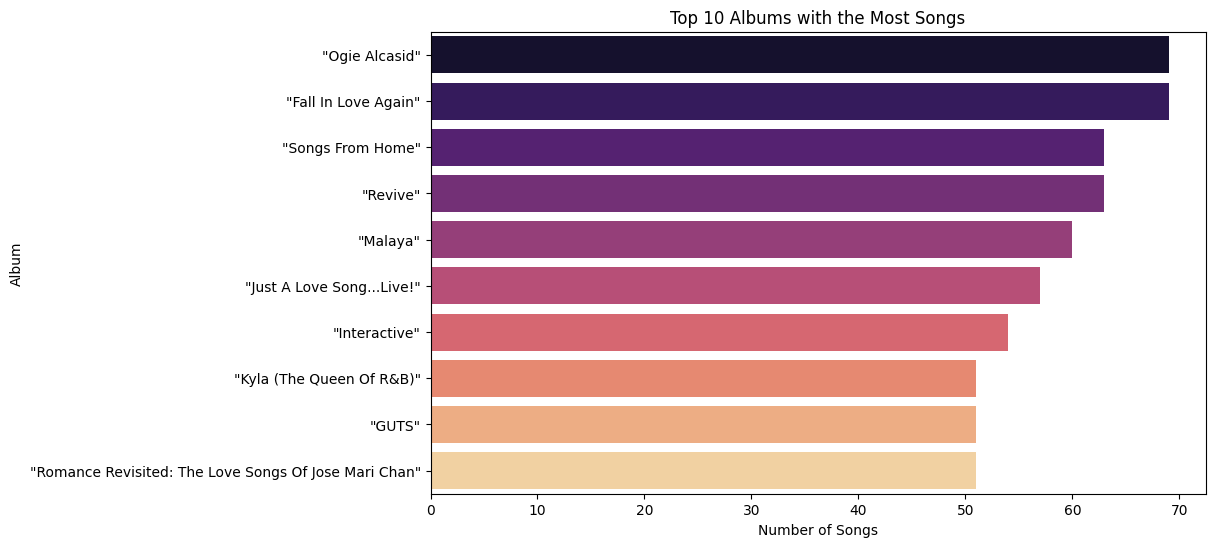

In [76]:
# Remove the specific artist
df_filtered = df[df['Album'] != 'No Album']

# Group by artist and count the number of songs
artist_song_counts = df_filtered['Album'].value_counts()

# Get the top 10 artists with the most songs
top_10_artists = artist_song_counts.head(10)

# Convert to DataFrame
top_10_artists_df = top_10_artists.reset_index()
top_10_artists_df.columns = ['Album', 'Number of Songs']

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artists_df, x='Number of Songs', y='Album', palette='magma')
plt.title('Top 10 Albums with the Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Album')
plt.xticks(rotation=45)
plt.show()

C:\Users\marty\AppData\Local\Temp\ipykernel_17268\2492728544.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_10_df, palette='magma')


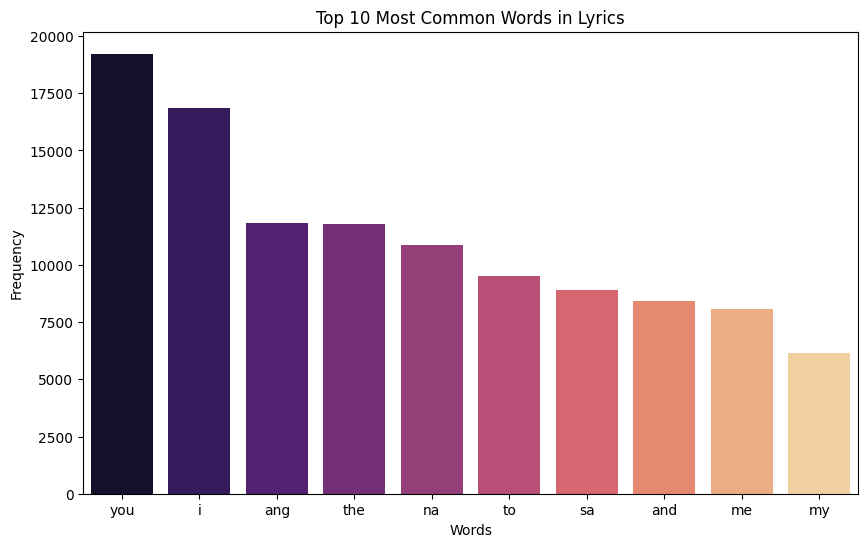

In [61]:
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(df['Lyrics'].dropna())

# Clean the text by removing non-alphabetic characters and converting to lowercase
all_lyrics = re.sub(r'[^a-zA-Z\s]', '', all_lyrics).lower()

# Split the cleaned text into words
words = all_lyrics.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Create a DataFrame for the top 10 words
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=top_10_df, palette='magma')
plt.title('Top 10 Most Common Words in Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

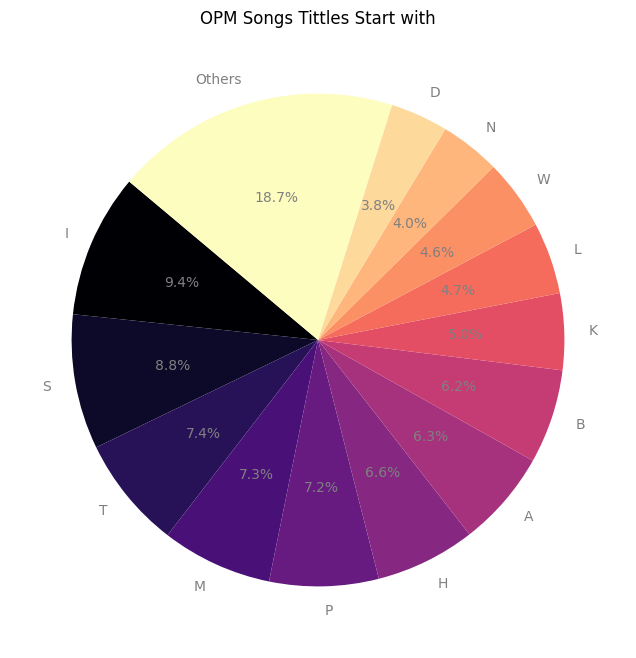

In [60]:
# Clean song titles and group alphabetically
df['Song'] = df['Song'].str.replace('"', '')  # Remove quotation marks
df['First_Letter'] = df['Song'].str[0]  # Get the first letter
song_counts = df.groupby('First_Letter').size().sort_values(ascending=False)

# Keep top 10 categories and group the rest into 'Others'
top_10_songs = song_counts.head(13)
other_count = song_counts.sum() - top_10_songs.sum()
top_10_songs['Others'] = other_count

# Plot the pie chart
colors = cm.magma(np.linspace(0, 1, len(top_10_songs)))
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs, labels=top_10_songs.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'grey'})
plt.title('OPM Songs Tittles Start with')
plt.show()